In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster
# import plantcv

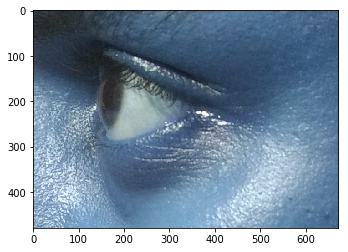

In [5]:
img = cv2.imread('/home/turing/repos/Exophthalmometer/sharedrive-ETE/cropped/IMG_20180705_180952020.jpeg')
plt.imshow(img,cmap='gray')

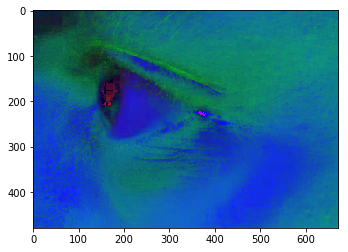

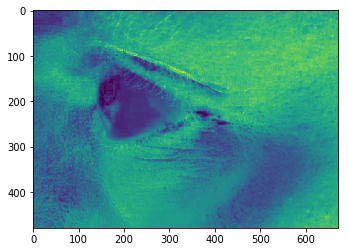

In [28]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()
h,s,v = cv2.split(hsv)
plt.imshow(s)

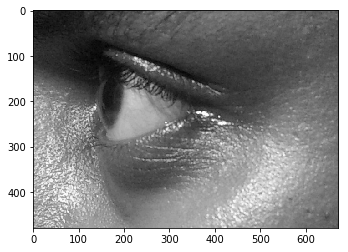

In [29]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')


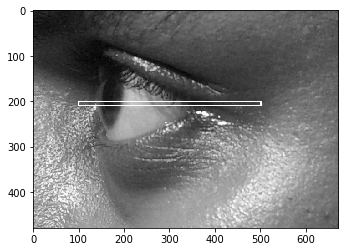

In [30]:
ref = (494, 195)
img_rec = cv2.rectangle(gray,(100,200),(500,210),(255,0,0),2)
plt.imshow(img_rec,cmap='gray')

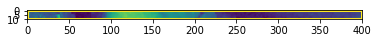

(10, 400)


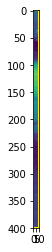

In [31]:
img_roi = gray[200:210,100:500]
plt.imshow(img_roi)
plt.show()
print(img_roi.shape)
img_roi_t = img_roi.transpose()
plt.imshow(img_roi_t)

In [32]:
kmeans_cluster = cluster.KMeans(n_clusters=3)

In [33]:
kmeans_cluster.fit(img_roi_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
centroids = kmeans_cluster.cluster_centers_
labels = kmeans_cluster.labels_
print(labels)

[0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [35]:
a = []
b = []
c = []

for i in labels:
    if i == 0:
        a.append(i)
    elif i==1:
        b.append(i)
    else:
        c.append(i)
        
centroids[a] = 0
centroids[b] = 100
centroids[c] = 255

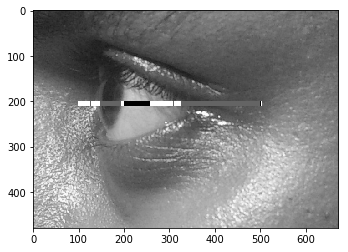

In [36]:
gray[200:210,100:500] = centroids[labels].transpose()
plt.imshow(gray,cmap='gray')